# Data Visualization


**Author:** Minh Phan (UW Varanasi intern 2023)


This tutorial guides you through some visualizations of the Indian Ocean zarr dataset.

In [20]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # simple plotting
import holoviews as hv # simple plotting
import hvplot.xarray # simple plotting
import cmocean

## Read data

In [2]:
ds = xr.open_zarr("~/shared-public/mind_the_chl_gap/IO.zarr")

In [3]:
ds

<xarray.Dataset> Size: 66GB
Dimensions:                       (time: 16071, lat: 177, lon: 241)
Coordinates:
  * lat                           (lat) float32 708B 32.0 31.75 ... -11.75 -12.0
  * lon                           (lon) float32 964B 42.0 42.25 ... 101.8 102.0
  * time                          (time) datetime64[ns] 129kB 1979-01-01 ... ...
Data variables: (12/27)
    CHL                           (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    CHL_cmes-cloud                (time, lat, lon) uint8 686MB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    CHL_cmes-gapfree              (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    CHL_cmes-land                 (lat, lon) uint8 43kB dask.array<chunksize=(177, 241), meta=np.ndarray>
    CHL_cmes-level3               (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    CHL_cmes_flags-gapfree        (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    ...                            ...
    ug_curr                       (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    v_curr                        (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    v_wind                        (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    vg_curr                       (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    wind_dir                      (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    wind_speed                    (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    ...                              ...
    time_coverage_end:               2024-04-18T02:58:23Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-04-16T21:12:05Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-mult...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0

We can slice data by the dimensions (latitude, longitude, time) and data variables. 

In [4]:
# slice by latitude
# notice how we specify the range in reverse
ds.sel(lat=slice(0, -12))

<xarray.Dataset> Size: 18GB
Dimensions:                       (time: 16071, lat: 49, lon: 241)
Coordinates:
  * lat                           (lat) float32 196B 0.0 -0.25 ... -11.75 -12.0
  * lon                           (lon) float32 964B 42.0 42.25 ... 101.8 102.0
  * time                          (time) datetime64[ns] 129kB 1979-01-01 ... ...
Data variables: (12/27)
    CHL                           (time, lat, lon) float32 759MB dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    CHL_cmes-cloud                (time, lat, lon) uint8 190MB dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    CHL_cmes-gapfree              (time, lat, lon) float32 759MB dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    CHL_cmes-land                 (lat, lon) uint8 12kB dask.array<chunksize=(49, 241), meta=np.ndarray>
    CHL_cmes-level3               (time, lat, lon) float32 759MB dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    CHL_cmes_flags-gapfree        (time, lat, lon) float32 759MB dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    ...                            ...
    ug_curr                       (time, lat, lon) float32 759MB dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    v_curr                        (time, lat, lon) float32 759MB dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    v_wind                        (time, lat, lon) float32 759MB dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    vg_curr                       (time, lat, lon) float32 759MB dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    wind_dir                      (time, lat, lon) float32 759MB dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
    wind_speed                    (time, lat, lon) float32 759MB dask.array<chunksize=(100, 49, 241), meta=np.ndarray>
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    ...                              ...
    time_coverage_end:               2024-04-18T02:58:23Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-04-16T21:12:05Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-mult...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0

In [5]:
# slice by longitude
ds.sel(lon=slice(42, 45))

<xarray.Dataset> Size: 4GB
Dimensions:                       (time: 16071, lat: 177, lon: 13)
Coordinates:
  * lat                           (lat) float32 708B 32.0 31.75 ... -11.75 -12.0
  * lon                           (lon) float32 52B 42.0 42.25 ... 44.75 45.0
  * time                          (time) datetime64[ns] 129kB 1979-01-01 ... ...
Data variables: (12/27)
    CHL                           (time, lat, lon) float32 148MB dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    CHL_cmes-cloud                (time, lat, lon) uint8 37MB dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    CHL_cmes-gapfree              (time, lat, lon) float32 148MB dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    CHL_cmes-land                 (lat, lon) uint8 2kB dask.array<chunksize=(177, 13), meta=np.ndarray>
    CHL_cmes-level3               (time, lat, lon) float32 148MB dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    CHL_cmes_flags-gapfree        (time, lat, lon) float32 148MB dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    ...                            ...
    ug_curr                       (time, lat, lon) float32 148MB dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    v_curr                        (time, lat, lon) float32 148MB dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    v_wind                        (time, lat, lon) float32 148MB dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    vg_curr                       (time, lat, lon) float32 148MB dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    wind_dir                      (time, lat, lon) float32 148MB dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
    wind_speed                    (time, lat, lon) float32 148MB dask.array<chunksize=(100, 177, 13), meta=np.ndarray>
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    ...                              ...
    time_coverage_end:               2024-04-18T02:58:23Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-04-16T21:12:05Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-mult...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0

In [6]:
# slice by time
ds.sel(time=slice('1998', '1999'))

<xarray.Dataset> Size: 3GB
Dimensions:                       (time: 730, lat: 177, lon: 241)
Coordinates:
  * lat                           (lat) float32 708B 32.0 31.75 ... -11.75 -12.0
  * lon                           (lon) float32 964B 42.0 42.25 ... 101.8 102.0
  * time                          (time) datetime64[ns] 6kB 1998-01-01 ... 19...
Data variables: (12/27)
    CHL                           (time, lat, lon) float32 125MB dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    CHL_cmes-cloud                (time, lat, lon) uint8 31MB dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    CHL_cmes-gapfree              (time, lat, lon) float32 125MB dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    CHL_cmes-land                 (lat, lon) uint8 43kB dask.array<chunksize=(177, 241), meta=np.ndarray>
    CHL_cmes-level3               (time, lat, lon) float32 125MB dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    CHL_cmes_flags-gapfree        (time, lat, lon) float32 125MB dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    ...                            ...
    ug_curr                       (time, lat, lon) float32 125MB dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    v_curr                        (time, lat, lon) float32 125MB dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    v_wind                        (time, lat, lon) float32 125MB dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    vg_curr                       (time, lat, lon) float32 125MB dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    wind_dir                      (time, lat, lon) float32 125MB dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
    wind_speed                    (time, lat, lon) float32 125MB dask.array<chunksize=(60, 177, 241), meta=np.ndarray>
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    ...                              ...
    time_coverage_end:               2024-04-18T02:58:23Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-04-16T21:12:05Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-mult...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0

In [7]:
# slice by variable
ds[['u_curr', 'u_wind']]

<xarray.Dataset> Size: 5GB
Dimensions:  (time: 16071, lat: 177, lon: 241)
Coordinates:
  * lat      (lat) float32 708B 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon      (lon) float32 964B 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
  * time     (time) datetime64[ns] 129kB 1979-01-01 1979-01-02 ... 2022-12-31
Data variables:
    u_curr   (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
    u_wind   (time, lat, lon) float32 3GB dask.array<chunksize=(100, 177, 241), meta=np.ndarray>
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    ...                              ...
    time_coverage_end:               2024-04-18T02:58:23Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-04-16T21:12:05Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-mult...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0

In [8]:
# combine multiple slicing options all at once
ds[['u_curr', 'u_wind']].sel(time=slice('1998', '1999'), 
                             lat=slice(0, -12), 
                             lon=slice(42, 45))

<xarray.Dataset> Size: 4MB
Dimensions:  (time: 730, lat: 49, lon: 13)
Coordinates:
  * lat      (lat) float32 196B 0.0 -0.25 -0.5 -0.75 ... -11.5 -11.75 -12.0
  * lon      (lon) float32 52B 42.0 42.25 42.5 42.75 ... 44.25 44.5 44.75 45.0
  * time     (time) datetime64[ns] 6kB 1998-01-01 1998-01-02 ... 1999-12-31
Data variables:
    u_curr   (time, lat, lon) float32 2MB dask.array<chunksize=(60, 49, 13), meta=np.ndarray>
    u_wind   (time, lat, lon) float32 2MB dask.array<chunksize=(60, 49, 13), meta=np.ndarray>
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    ...                              ...
    time_coverage_end:               2024-04-18T02:58:23Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-04-16T21:12:05Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-mult...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0

We can also graph the data right from slicing, especially heatmaps from 2D arrays, or line charts. This is especially useful when we want to inspect elements on the go.

In [9]:
# make sure that the array you slice for a heatmap visualization is a 2D array
heatmap_arr = ds['wind_speed'].sel(time='2000-01-02')
heatmap_arr

<xarray.DataArray 'wind_speed' (lat: 177, lon: 241)> Size: 171kB
dask.array<getitem, shape=(177, 241), dtype=float32, chunksize=(177, 241), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 708B 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon      (lon) float32 964B 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
    time     datetime64[ns] 8B 2000-01-02
Attributes:
    long_name:  10 metre absolute speed
    units:      m s**-1

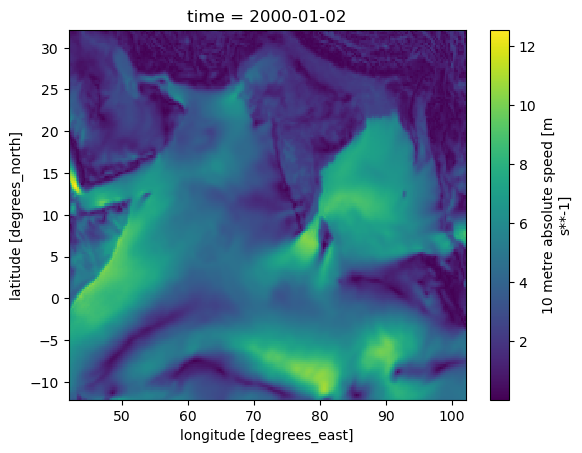

In [10]:
heatmap_arr.plot.imshow()

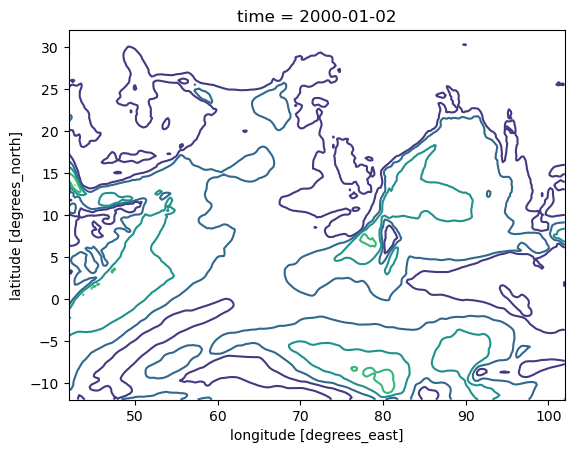

In [11]:
# contour map with no filling
heatmap_arr.plot.contour()

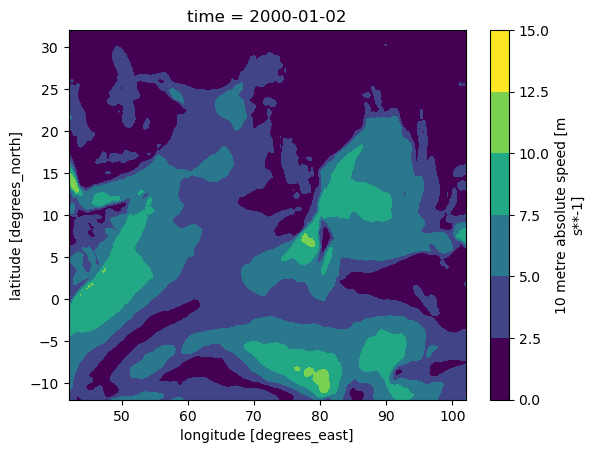

In [12]:
# contour map with color filling
heatmap_arr.plot.contourf()

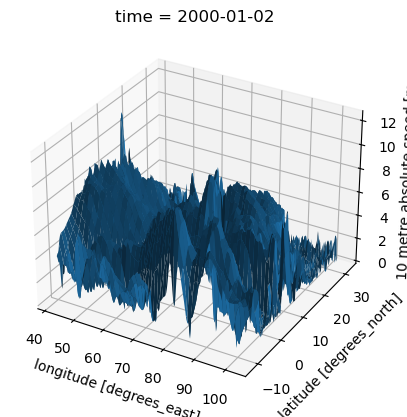

In [13]:
heatmap_arr.plot.surface()

In [19]:
# We can create interactive plots with hvplots
heatmap_arr.hvplot().options(cmap='bgy', width=600, height=500)

:Image   [lon,lat]   (10 metre absolute speed)

#### Line plots

This is mean daily wind speed by month.

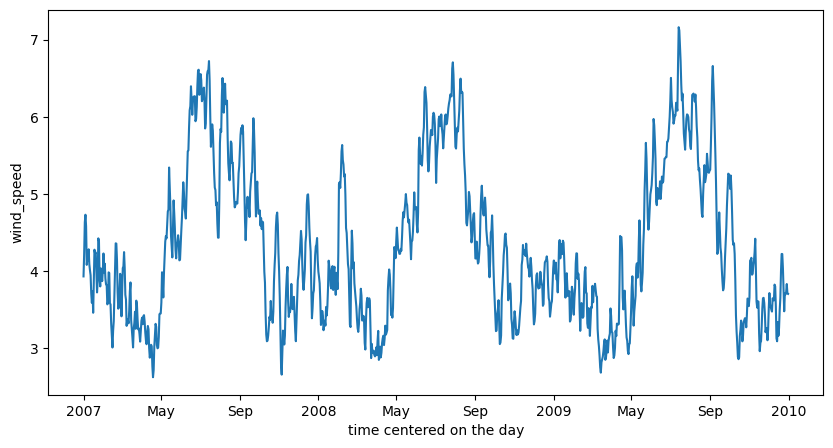

In [15]:
ds['wind_speed'].sel(time=slice('2007', '2009')).mean(dim=['lat', 'lon']).plot(figsize=(10, 5))

We can add in parameters to customize our graphs, as additional arguments are passed to the underlying matplotlib `plot()` function.

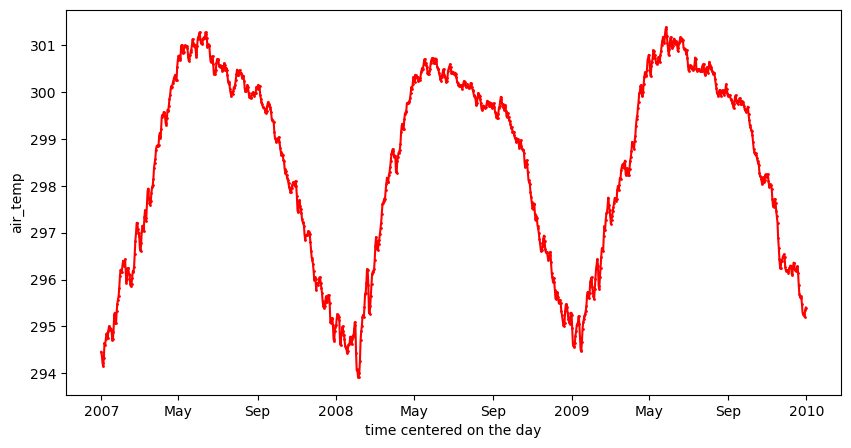

In [16]:
ds['air_temp'].sel(time=slice('2007', '2009')).mean(dim=['lat', 'lon']).plot.line('r-o', figsize=(10,5), markersize=1)

#### Histogram

Text(0.5, 1.0, 'Daily average wind direction distribution over covered area (1979-2022)')

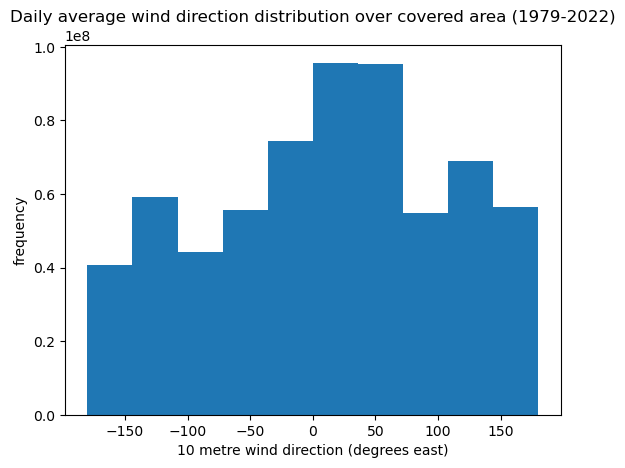

In [17]:
# creating a new Axe object if there is no currently
# available one
ax = plt.gca() 
ds['wind_dir'].plot.hist(ax = ax)
ax.set_xlabel('10 metre wind direction (degrees east)')
ax.set_ylabel('frequency')
ax.set_title('Daily average wind direction distribution over covered area (1979-2022)')

## Resampling

#### With xarray

We can resample (aggregate) your data temporally. It may take a long while for the data to finish resampling, especially if your dataset is big and your resampling frequency is small.

In [25]:
ds_resampled = ds['CHL_cmes-gapfree'].resample(time='1ME').mean()
ds_resampled

<xarray.DataArray 'CHL_cmes-gapfree' (time: 528, lat: 177, lon: 241)> Size: 90MB
dask.array<transpose, shape=(528, 177, 241), dtype=float32, chunksize=(6, 177, 241), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 708B 32.0 31.75 31.5 31.25 ... -11.5 -11.75 -12.0
  * lon      (lon) float32 964B 42.0 42.25 42.5 42.75 ... 101.5 101.8 102.0
  * time     (time) datetime64[ns] 4kB 1979-01-31 1979-02-28 ... 2022-12-31
Attributes: (12/101)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    ancillary_variables:             flags CHL_uncertainty
    citation:                        The Licensees will ensure that original ...
    ...                              ...
    type:                            surface
    units:                           milligram m-3
    valid_max:                       1000.0
    valid_min:                       0.0
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0

We can see that after resampling, our time dimension size is reduced from days to months.

In [28]:
CHL_month = ds_resampled.mean(dim=['lat', 'lon']).hvplot(label='monthly resampling').options(color='red', )
CHL_month

:Curve   [time]   (CHL_cmes-gapfree)

In [29]:
CHL_day = ds['CHL_cmes-gapfree'].mean(dim=['lat', 'lon']).hvplot(label='daily resampling').options(color='blue')

In [30]:
(CHL_day*CHL_month).options(title='Monthly vs Daily resampling of chlorophyll-a levels', xlabel='year')

:Overlay
   .Curve.Daily_resampling   :Curve   [time]   (CHL_cmes-gapfree)
   .Curve.Monthly_resampling :Curve   [time]   (CHL_cmes-gapfree)